Compararemos el rendimiento de los dos algoritmos en alta dimensión

Llamamos las librerías necesarias para el experimento

In [1]:
from numpy import zeros, array, mean, max, min
from SetsManager import generate_data, sparse_data
from Loss import LossFunction
from l1PrivateFrankWolfe import PolySFW
from l1PrivateVarianceReduced import PVarReducedFW
from numpy.random import rand
from matplotlib.pyplot import plot, show, fill_between, xlabel, ylabel, legend

En este primer experimento vamos a usar un dataset de tamaño fijo y haremos variar la dimiensión.

Seteamos los parámetros comunes para el experimento

In [3]:
radio_data = 20
epsilon = 2
delta = 0.01
tamano_data = 500
tamano_test = 500
f = LossFunction()
f.L0 = 8
f.L1 = 2
erroresFrankWolfe = dict()
erroresVarianceReduced = dict()
erroresGD = dict()
for logdim in range(6, 14):
    erroresFrankWolfe[logdim] = []
    erroresVarianceReduced[logdim] = []

Hacemos las iteraciones de los experimentos

In [ ]:
for logdim in range(6, 14):
    dim = 2**logdim
    while len(erroresFrankWolfe[logdim]) < 10:
        print(logdim, len(erroresFrankWolfe[logdim]))
        x_star = (1/20)*(2*rand(20) - 1)
        Y, Z = generate_data(x_star, tamano_data, radio_data, 0.05)
        Y_test, Z_test = generate_data(x_star, tamano_test, radio_data, 0.05)
        Z, Z_test = sparse_data(dim, Z, Z_test)
        model1 = PolySFW(Z, Y, epsilon, delta, f)
        model1.run()
        model2 = PVarReducedFW(Z, Y, epsilon, f, 10)
        model2.run()
        erroresFrankWolfe[logdim].append(f.set_f(model1.x_priv, Y_test, Z_test))
        erroresVarianceReduced[logdim].append(f.set_f(model2.x_final, Y_test, Z_test))

Obtenemos el grafico de la comparación

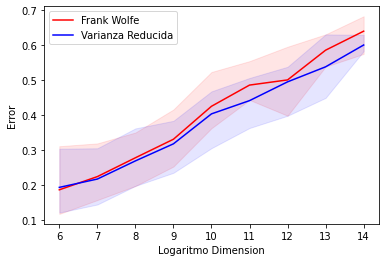

In [7]:
FWmean = array([mean(erroresFrankWolfe[dim]) for dim in range(6, 15)])
FWmax = array([max(erroresFrankWolfe[dim]) for dim in range(6, 15)])
FWmin = array([min(erroresFrankWolfe[dim]) for dim in range(6, 15)])

VRmean = array([mean(erroresVarianceReduced[dim]) for dim in range(6, 15)])
VRmax = array([max(erroresVarianceReduced[dim]) for dim in range(6, 15)])
VRmin = array([min(erroresVarianceReduced[dim]) for dim in range(6, 15)])


plot(range(6, 15), FWmean, color = 'r', label = 'Frank Wolfe')
fill_between(range(6, 15), FWmin, FWmax, color = 'red', alpha = 0.1)
plot(range(6, 15), VRmean, color = 'b', label = 'Varianza Reducida')
fill_between(range(6, 15), VRmin, VRmax, color = 'blue', alpha = 0.1)
ylabel('Error')
xlabel('Logaritmo Dimension')
legend()
show()

En este segundo experimento vamos a usar una dimensión fija y variaremos el tamaño del dataset

Seteamos los parametros comunes del experimento

In [2]:
radio_data = 20
epsilon = 2
delta = 0.01
tamano_data = 500
tamano_test = 500
f = LossFunction()
f.L0 = 8
f.L1 = 2
dim = 128
tamano_test = 1000
erroresFrankWolfe = dict()
erroresVarianceReduced = dict()
erroresGD = dict()
for logdata in range(3, 14):
    erroresFrankWolfe[logdata] = []
    erroresVarianceReduced[logdata] = []

Ejecutamos las iteraciones

In [ ]:
for logdata in range(3, 14):
    data = 2**logdata
    while len(erroresFrankWolfe[logdata]) < 10:
        print(logdata, len(erroresFrankWolfe[logdata]))
        x_star = (1/20)*(2*rand(20) - 1)
        Y, Z = generate_data(x_star, data, radio_data, 0.05)
        Y_test, Z_test = generate_data(x_star, tamano_test, radio_data, 0.05)
        Z, Z_test = sparse_data(dim, Z, Z_test)
        model1 = PolySFW(Z, Y, epsilon, delta, f)
        model1.run()
        model2 = PVarReducedFW(Z, Y, epsilon, f, 10)
        model2.run()
        erroresFrankWolfe[logdata].append(f.set_f(model1.x_priv, Y_test, Z_test))
        erroresVarianceReduced[logdata].append(f.set_f(model2.x_final, Y_test, Z_test))

Graficamos

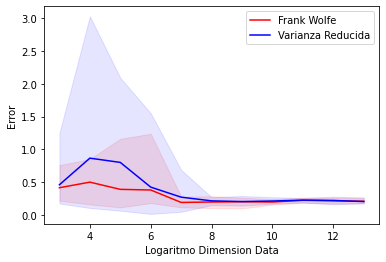

In [4]:
FWmean = array([mean(erroresFrankWolfe[logdata]) for logdata in range(3, 14)])
FWmax = array([max(erroresFrankWolfe[logdata]) for logdata in range(3, 14)])
FWmin = array([min(erroresFrankWolfe[logdata]) for logdata in range(3, 14)])

VRmean = array([mean(erroresVarianceReduced[logdata]) for logdata in range(3, 14)])
VRmax = array([max(erroresVarianceReduced[logdata]) for logdata in range(3, 14)])
VRmin = array([min(erroresVarianceReduced[logdata]) for logdata in range(3, 14)])


plot(range(3, 14), FWmean, color = 'r', label = 'Frank Wolfe')
fill_between(range(3, 14), FWmin, FWmax, color = 'red', alpha = 0.1)
plot(range(3, 14), VRmean, color = 'b', label = 'Varianza Reducida')
fill_between(range(3, 14), VRmin, VRmax, color = 'blue', alpha = 0.1)
ylabel('Error')
xlabel('Logaritmo Dimension Data')
legend()
show()